Seminární práce - HEUR - Ondřej Lanč
=====================================

Řešení úlohy obchodního cestujícího pomocí optimalizace mravenčí kolonií
=========================================================================

Pro svou seminární práci jsem si vybral velmi známý matematický problém, a to úlohu obchodního cestujícího. Ačkoliv jsme se mu již věnovali na cvičeních, chtěl jsem na tomto problému vyzkoušet i jiné heuristické metody, ke kterým se již během výuky zcela nedostalo. Konkrténě se jedná o optimalizaci pomocí mravenčí kolonie, ke které se tato úloha přímo nabízí.

Nejprve uvedu zadání problému a možné metody přesného řešení a poté popíšu použité heuristické metody a jejich parametry.   

Úloha obchodníh ocestujícího (TSP)
----------------------------------
Úloha obchodního cestujícího spočívá v nalezení nejkratší cesty vedoucí přes všechna města a vracející se zpět do města výchozího, přičemž každým městem (kromě výchozího) projde cesta právě jednou.

Implementace světa a generování zadání
--------------------------------------

Implementace světa jsem pojal relativně obecně. Svět obshauje seznam měst a seznam všech cest mezi nimi.

Město je definováno svou pozicí (x,y), ačkoliv ta není pro výpočet zcela podstatná. Důležitý pro výpočet je seznam cest vedoucích z daného města. Cesty jsou určeny koncovými městy a svou délkou a jsou implementovány jako jednosměrné, je tedy možné mít cestu jedním směrem delší než druhým směrem. Případně je možné mít cestu pouze mezi něktrými městy.

Kromě ručního zadání měst je možné také vygenerovat zadání. V takovém případě je na plochu o definovaných rozměrech vygenerován příslušný počet měst. Následně se vygenerují cesty mezi každou dvojicí měst oběma směry a spočítá se vzdálenost mezi nimi. Pro výpočet vzdálenosti je použita euklidovská vzdálenost, ale systém je navrhnut i pro jiný způsob výpočtu vzdáleností.

Načteme nejprve všechny potřebné balíčky.

In [1]:
__author__ = 'Ondřej Lanč'

import matplotlib.pyplot as plt
import timeit
from world.world import World
from solver.brute import brute
from solver.greedy import greedy_all, greedy_rand
from solver.held_karp import hk
from solver.ACO.colony import Colony
get_ipython().magic('matplotlib inline')

Vytvoříme svět, v tomto případě čtvercová plocha 1000x1000 a v něm náhodně rozmístíme 10 měst. Následně tato města zobrazíme. Parametrem city_seed je možno nastavit generátor pseudonáhodných čísel na konkrtétní stále stejný set měst.

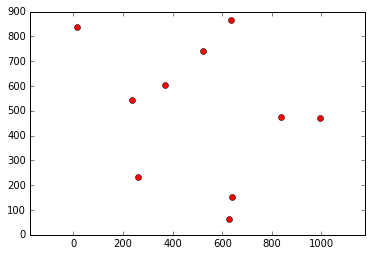

In [2]:
count_of_cities = 10
upper_bound = 1000
city_seed = 3
world=World()
world.random_world(count_of_cities, upper_bound, upper_bound, city_seed)
world.plot()
plt.show()

Přesné řešení
---------------
Nyní máme vygenerován svět s městy. Ukážeme si metody přesného řešení. Implementoval jsem dva algoritmy. Zaprvé jednoduchý generátor všech permutací, z nichž vybereme tu nejlepší. Tato možnost ovšem není moc efektivní a již při malých počtech měst je velmi neefektivní, uvádím ji spíše pro srovnání. Proto jsem implementoval druhý algoritmus a to Held-Karpovův algoritmus, který je považován za jeden z nejlepších možných přesných řešičů TSP. Nicméně stále, vzhledem k typu úlohy, pracuje s exponenciální složitostí. Pro vyšší počet měst tedy není použitelný žádný z nich. Nicméně, HK algoritmus je přece jen o poznání rychlejší.

Held-Karpovův algoritmus je metoda dynamického programování, která se snaží problém rozdlělit na menší celky. Konkrétně tedy vychází z myšlenky, že cesta (subcesta), obsažená v cestě s minimální délkou, je také minimální délky. Rozdělí tedy rekurzivně problém na problémy s menším počtem měst, až na cestu mezi dvěma městy, kde již lze vzdálenost snadno zjisit.

V následujícíh ukázkách vidíme porovnání těchto dvou metod. Samozřejmě výsledky jsou stejné, ale jak můžeme vidět, liší se výrazně časem výpočtu, kdy HK je zhruba 10x rychlejší.



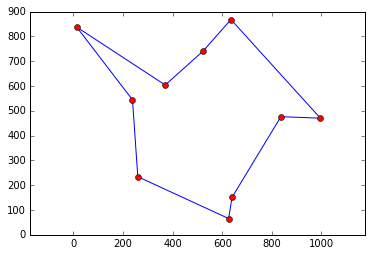

Nejlepší permutace
Nejkratší cesta je dlouhá  3047.99741406
Čas výpočtu: 26.310160236083902


In [3]:
start_time = timeit.default_timer()
route=brute(world)
end_time=timeit.default_timer() 
world.plot(route)
plt.show()
distance=route.length()
print("Nejlepší permutace")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

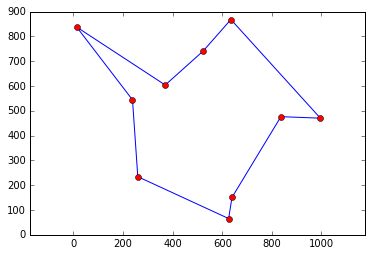

Held-Karp
Nejkratší cesta je dlouhá  3047.99741406
Čas výpočtu: 2.1285412040306255


In [4]:
start_time = timeit.default_timer()
route=hk(world)
end_time=timeit.default_timer() 
world.plot(route)
plt.show()
distance=route.length()
print("Held-Karp")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

Hladový algoritmus - nejbližší soused
-------------------------------------
Nyní uvedeme první heuristický přítup. Ačkoliv je HK algoritmus poměrně ryhchlý, pro větší počet měst je již nepoužitélný, například již při 12 městech se čas výpočtu z cca 2 sekund zvýšil na 220s.

První metodou je metoda nejbližšího souseda. Začíname v určeném městě a pokračujeme vždy do nejbližšího sousedního města. Na konci uzavřeme cyklus. Proces je závislý na startovní pozici, tuto vybíráme náhodně. Pro získání nejlepšího možného výsledku tímto algoritmem je možnost opakovat start ve všech městech a následně vybrat nějkratší trasu. Pro srovnání uvádím oba postupy. V dalších výpočtech budeme používat výhradně ten druhý, přesnější. Jeho výpočetní náročnost vzroste "pouze" nx, což je pro nás přijatelné.

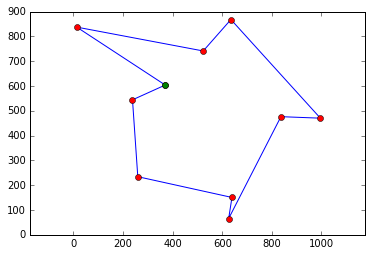

HLadový algoritmus - náhodný start
Nejkratší cesta je dlouhá  3202.90834585
Čas výpočtu: 0.00010231800843030214


In [5]:
start_time = timeit.default_timer()
route=greedy_rand(world)
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("HLadový algoritmus - náhodný start")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

Jak vidíme, výsledek není optimální, nicméně je relatině uspokojující. Startovní město je vyzančeno zeleně. Lepších výsledků dosáhneme pomocí opakování postupu ve všech městech. Jak vidíme níže, ani zde není výsledek optimální. Nicméně je o poznání lepší.

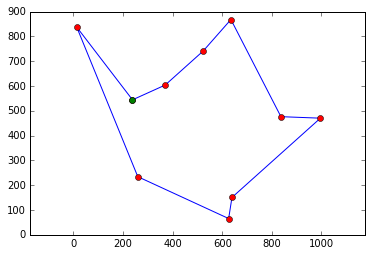

HLadový algoritmus - nejlepší start
Nejkratší cesta je dlouhá  3108.73969874
Čas výpočtu: 0.00042233301792293787


In [6]:
start_time = timeit.default_timer()
route=greedy_all(world)
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("HLadový algoritmus - nejlepší start")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

Optimalizace pomocí mravenčí kolonie (ACO)
-----------------------------------------

Tato přírodou inspirovaná heuristika napodobuje chování mravenců při hledání potravy. Mravenci při pohybu sledují feromonovou stopu ostatních mravenců. Pokud jde mravnec po delší cestě, tedy déle, dojde k většímu odparu feromonů a jeho stopa je slabší. Další mravenci, kteří jdou za ním, si tuto cestu vyberou s menší pravděpodobností, než cestu se silnější feromonovou stopu. Následně čím více mravenců jde po dané cestě, tím je feromonová stopa silnější a také je větší pravděpodobnost výběru této cesty dalšími mravenci. Tímto iteračním způsobem se tedy vybere co nejkratší možná cesta.

Existuje mnoho algoritmů využívajících tohoto principu. A také kombinaci s dalšími metodami. Budu se věnovat pouze popisu mnou implemetnovaného algoritmu a možností nastavení parametrů. 

V mém algoritmu je halvním prvkem mravenčí kolonie, jendotliví mravenci jsou součástí této kolonie. Na cestu jsou posíláni ve vlnách v pevně stanoveném počtu. Každý jednotlivý mravenec nezávisle na ostatních najde vlastní cestu. Po každé vlně se provede aktualizace feromonu. Nastupuje další vlna mravenců a postup se opakuje až do předem stanoveného počtu vln.

<h3>Výběr trasy mravence</h3>
Jendotlivý mravenec se v každém městě rohoduje o své další cestě následujícím postupem. Nejdříve vypočítá váhy jednotlivých cest podle vzorce: (1/delka_cesty)^alpha) * (1 + path.pher)^beta. Parametry alpha a beta určují vliv jednotlivých složek. Poté se cesty seřadí sestupně podle vah a naskládají se za sebe na pomyslné číselné ose od nuly až do celkového součtu vah. Z tohoto intervalu se vybere náhodné číslo, do kterého subintervalu patří, taková cesta se vybere. Dále jsem přidal možnost upravit vliv náhody pomocí parametru, který upřednostňuje výběr výsledků s vyšší váhou. Přesný předpis pro výběr náhodného čísla z intervalu je (random()^gamma) * total), při parametru gamma=1 se tedy vybere vskutku náhodné číslo a váhy odpovídají pravděpodobnostem výběru cest. Při gamma=0 se vybírá vždy nejlepší cesta a pravděpodobnost nehraje roli. Při parametru gamma mezi 0 až 1 upřednostňujeme více lepší cesty, při vyšších hodnotách horší cesty.
 
<h3>Pokládání feromonu</h3>
Nejprve pomocí předchozího postupu najde mravenec nějakou možnou trasu o délce l. Poté na všechny spojnice měst (cesty) na této trase umístí feromonovou stopu jejíž velikost je určena jako podíl konstantního množství feromonu (q), a délky l. Nové monožství feromonu je tedy na jednotlivých cestách p=p0+q/l. Pokládání feromonu je uskutečněno vždy po průchodu jedné vlny mravenců, mravenci v rámci jedné vlny na sebe nemají tedy žádný vliv ani pomocí feromonů. Vždy před položením nové várky feromonů dojde k výparu předchozích feromonů ze všech cest. 

Dále máme možnost určit tzv. elitní mravence, kteří ukládáají větší feromonovou stopu. V našem případě se jedná vždy o mravence, který v danné vlně nalezl nejkratší cestu. Takovému mravenci lze určit, že položí násobně více feromunu než ostatní, a tím se stane jeho trasa preferovanější. Může to ovšem vést k předčasné konvergenci. Pokud určíme násobnost feromonu elitného mravence jako 1, chová se stejně jako ostatní mravenci.



<h3>Parametry kolonie</h3>
Nyní popíšu jednotlivé parametry kolonie mravenců.
* svět - instance popisu světu s městy
* počet mravenců - počet mravenců v jedné vlně
* počet vln
* rho - koeficient výparu, od 0  - vypaří se všechen feromon v daném kroku do 1 nevypaří se žádný
* alpha - vliv vzdálenosti na určení preferované cesty
* beta - vliv feromonu na určení preferované cesty
* gamma - vliv náhody na určení preferované cesty
* start - startovní město, pokud není, rozmístí se všichni mravenci náhodně
* elite - číslo, určující, kolikrát vyšší je feromon u elitního mravence





Nyní pro porovnání provedeme výpočet na předchozím případu.

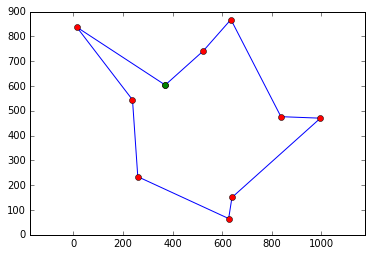

ACO - start všech mravenců je náhodný
Nejkratší cesta je dlouhá  3049.49765836
Čas výpočtu: 0.06335040600970387


In [7]:
world.reset_pher()
colony = Colony(world, 5, 100, rho=0.5, alpha=2, beta=1, gamma=0.2)
start_time = timeit.default_timer()
route, routes=colony.solve()
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("ACO - start všech mravenců je náhodný")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

TSP - pouze heuristiky
======================
V následujícím textu se budeme zabývat porovnáním heuristik pro větší počet měst. Budeme počátat s 50 městy což je již pro přesný postup takřka nemožné. Budeme tedy porovnávat pouze hladový algoritmus a optimalizaci pomocí maravenčí kolonie. Pro hladový algoritmus provedeme již popsané zlepšení, tedy provedeme start ve všech městech, a vybereme nejlepší možný výsledek. Pro metodu ACO použijeme nejelepší experimentálně získané parametry. Jendá se konkrténě o to, že počet mravenců v jedné vlně je roven počtu měst. Počet vln je alespoň 100-200. Koeficient odparu je 0.5, po každé vlně se tedy odpaří polovina feromonu z předchozích kroků. Koeficienty výpočtu vah alpha=2, beta=1. Upředostňujeme více možnosti s vyšší vahou koeficientem gamma=0.2. Elitní mravenec má 100 násobně vyšší kapacitu feromonu. Startovní pozice mravenců je náhodná.

Příklad 1
---------
V příkladu vždy uvedeme rozmístění měst, výsledek pomocí hladového algoritmu a výsledek pomocí ACO. Následně ukážeme graf výsledků elitních mravenců, tedy nejlepších hodnot v každé vlně. A také v tomto příkladu zobrazíme rozmístění feromonů na jendotlivých cestách.

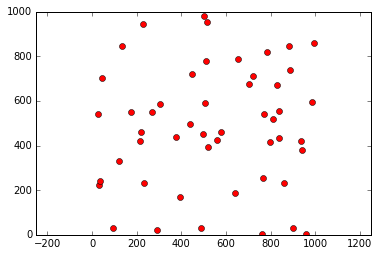

In [8]:
count_of_cities = 50
upper_bound = 1000
city_seed = 1
world=World()
world.random_world(count_of_cities, upper_bound, upper_bound, city_seed)
world.plot()
plt.show()

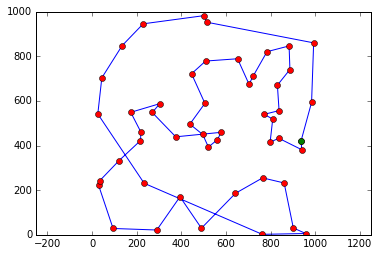

HLadový algoritmus - nejlepší start
Nejkratší cesta je dlouhá  7123.80502132
Čas výpočtu: 0.05000014905817807


In [9]:
start_time = timeit.default_timer()
route=greedy_all(world)
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("HLadový algoritmus - nejlepší start")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)
start=route[0]

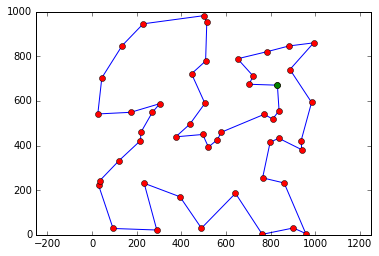

ACO - start všech mravenců je náhodný
Nejkratší cesta je dlouhá  6262.57183424
Čas výpočtu: 22.707555935019627


In [10]:
world.reset_pher()
colony = Colony(world, 50, 200, rho=0.5, alpha=2, beta=1, gamma=0.2, elite=100)
start_time = timeit.default_timer()
route, routes=colony.solve()
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("ACO - start všech mravenců je náhodný")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

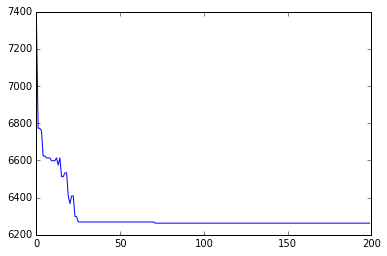

In [11]:
plt.plot(routes[0], routes[1])
plt.show()

4.60633209666


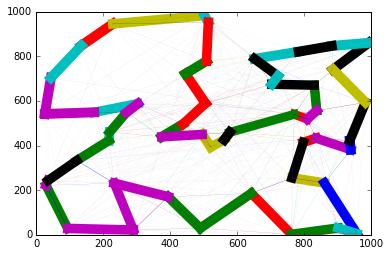

In [12]:
pher_max=max([path.pher for path in world.paths])
print(pher_max)
for path in world.paths:
    plt.plot([path.start.x, path.finish.x], [path.start.y, path.finish.y], linewidth=(((path.pher)/(pher_max))*10))
plt.show()

Příklad 2
---------

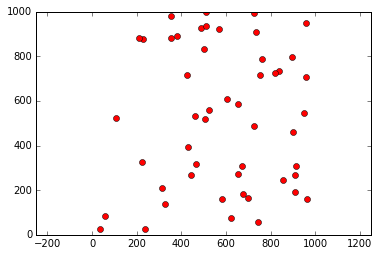

In [13]:
count_of_cities = 50
upper_bound = 1000
city_seed = 2
world=World()
world.random_world(count_of_cities, upper_bound, upper_bound, city_seed)
world.plot()
plt.show()

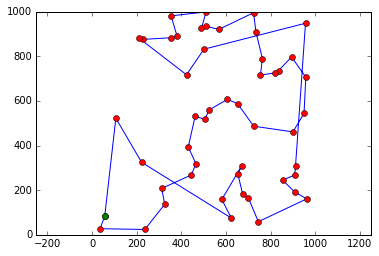

HLadový algoritmus - nejlepší start
Nejkratší cesta je dlouhá  6695.29606588
Čas výpočtu: 0.05330198991578072


In [14]:
start_time = timeit.default_timer()
route=greedy_all(world)
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("HLadový algoritmus - nejlepší start")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)
start=route[0]

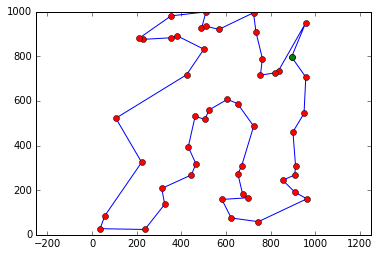

ACO - start všech mravenců je náhodný
Nejkratší cesta je dlouhá  5719.16932877
Čas výpočtu: 22.164432161021978


In [15]:
world.reset_pher()
colony = Colony(world, 50, 200, rho=0.5, alpha=2, beta=1, gamma=0.2, elite=100)
start_time = timeit.default_timer()
route, routes=colony.solve()
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("ACO - start všech mravenců je náhodný")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

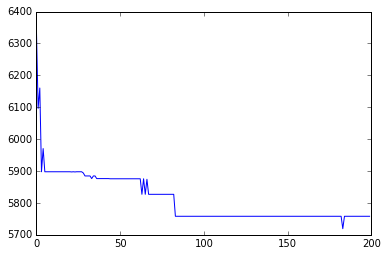

In [16]:
plt.plot(routes[0], routes[1])
plt.show()

Příklad 3
---------

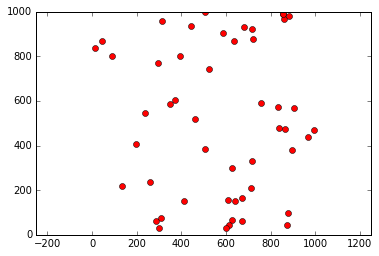

In [17]:
count_of_cities = 50
upper_bound = 1000
city_seed = 3
world=World()
world.random_world(count_of_cities, upper_bound, upper_bound, city_seed)
world.plot()
plt.show()

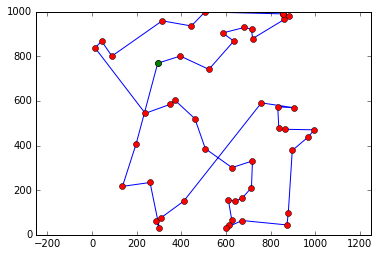

HLadový algoritmus - nejlepší start
Nejkratší cesta je dlouhá  6138.07304935
Čas výpočtu: 0.04882506199646741


In [18]:
start_time = timeit.default_timer()
route=greedy_all(world)
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("HLadový algoritmus - nejlepší start")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)
start=route[0]

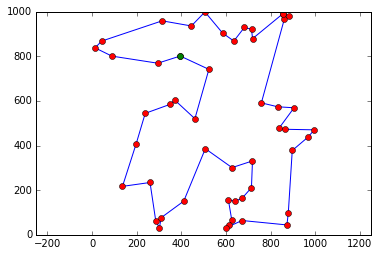

ACO - start všech mravenců je náhodný
Nejkratší cesta je dlouhá  5446.23962431
Čas výpočtu: 23.515943531994708


In [19]:
world.reset_pher()
colony = Colony(world, 50, 200, rho=0.5, alpha=2, beta=1, gamma=0.2, elite=100)
start_time = timeit.default_timer()
route, routes=colony.solve()
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("ACO - start všech mravenců je náhodný")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

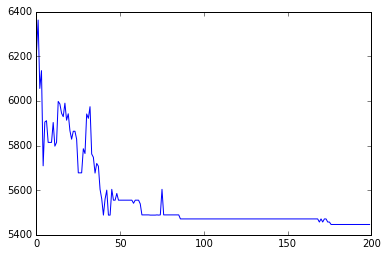

In [20]:
plt.plot(routes[0], routes[1])
plt.show()

Příklad 4
---------

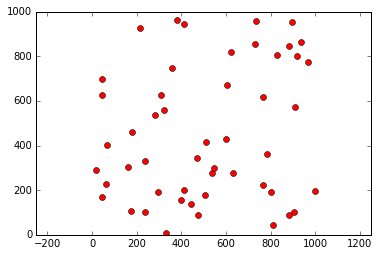

In [21]:
count_of_cities = 50
upper_bound = 1000
city_seed = 4
world=World()
world.random_world(count_of_cities, upper_bound, upper_bound, city_seed)
world.plot()
plt.show()

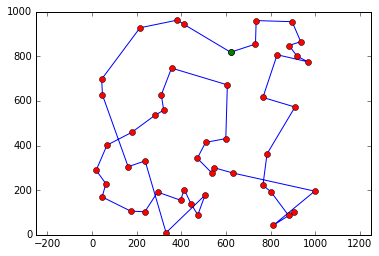

HLadový algoritmus - nejlepší start
Nejkratší cesta je dlouhá  6594.13468776
Čas výpočtu: 0.05476503598038107


In [22]:
start_time = timeit.default_timer()
route=greedy_all(world)
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("HLadový algoritmus - nejlepší start")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)
start=route[0]

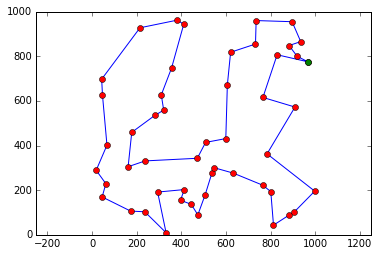

ACO - start všech mravenců je náhodný
Nejkratší cesta je dlouhá  6005.46285982
Čas výpočtu: 22.50081336009316


In [23]:
world.reset_pher()
colony = Colony(world, 50, 200, rho=0.5, alpha=2, beta=1, gamma=0.2, elite=100)
start_time = timeit.default_timer()
route, routes=colony.solve()
end_time=timeit.default_timer() 
world.plot(route, route[0])
plt.show()
distance=route.length()
print("ACO - start všech mravenců je náhodný")
print("Nejkratší cesta je dlouhá ", distance)
print("Čas výpočtu:", end_time - start_time)

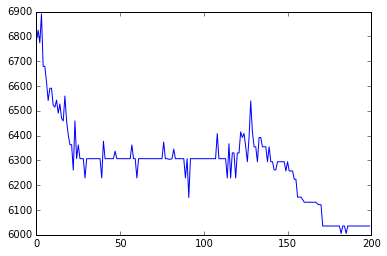

In [24]:
plt.plot(routes[0], routes[1])
plt.show()

Závěr
=====
Vidíme, že metoda ACO nám dává v průměru o více než deset procent lepší výsledky než hladový algroitmus. Výsledek je lepší, samozřejmě na úkor času, nicméně výpočet stále probíhá relativně rychle. Pro větší počet měst bude zapotřebí také větší počet mravenců a větší počet vln k ustálení nejkratší nalezené cesty. Také lze kromě ručního zadání počtu vln nechat počet vln volný a posílat další a další mravence. Problém nastává v tom, kdy výpočet ukončit, protože i na těctho jednoduchých příkladech vidíme, že i po dlouhé době, kdy elitní mravenci dosahovali stále stejných výsledků, najednou došlo ke skoku a výsledky se ještě zlepšily. Je tedy obtížné říct, po jak dlouhé době neměnnosti výsledků lze určit jednoznačný výsledek. Nicméně tento problém by potřeboval delší zkoumání a je už mimo rozsah této práce.
